$s$

In [5]:
import ipywidgets as widgets
out = widgets.Output()
with out:
    
    %bookmark 'model_dir'
    current_dir = %pwd
    while 'models' in current_dir:
        %cd ..
        current_dir = %pwd
    %bookmark 'base_dir'
    %cd source_code
    out.clear_output()
%run base
%run gui_v6
with out:
    %cd ..
    %cd models/st100_v1/front_suspension
    out.clear_output()


In [6]:
m=model()
m.show()

## VEHICLE DYNAMICS MODELING AND SIMULATION TOOL

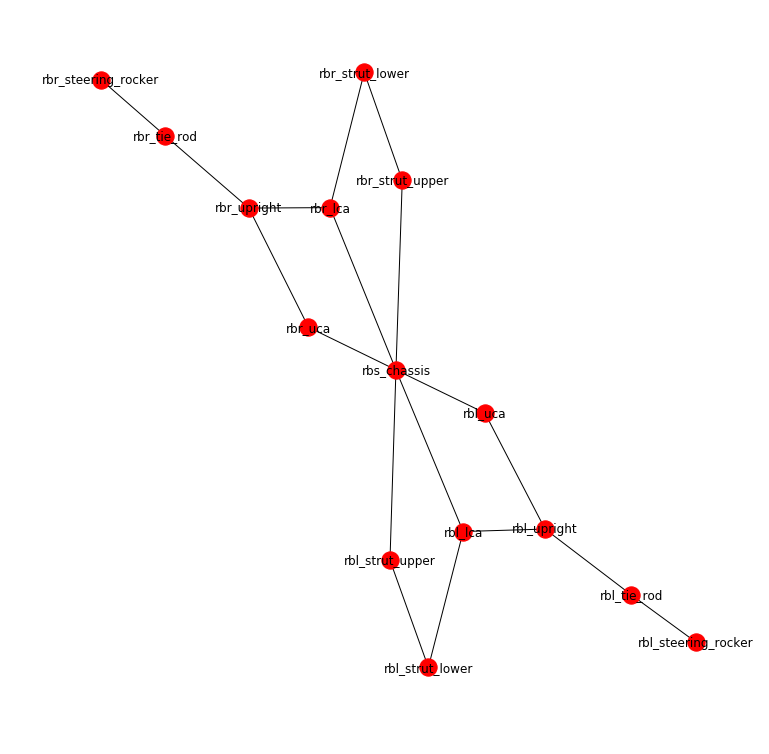

In [43]:
m.draw_topology()

In [8]:
s=model()
s.show()

## VEHICLE DYNAMICS MODELING AND SIMULATION TOOL

In [18]:
s.model_tree()

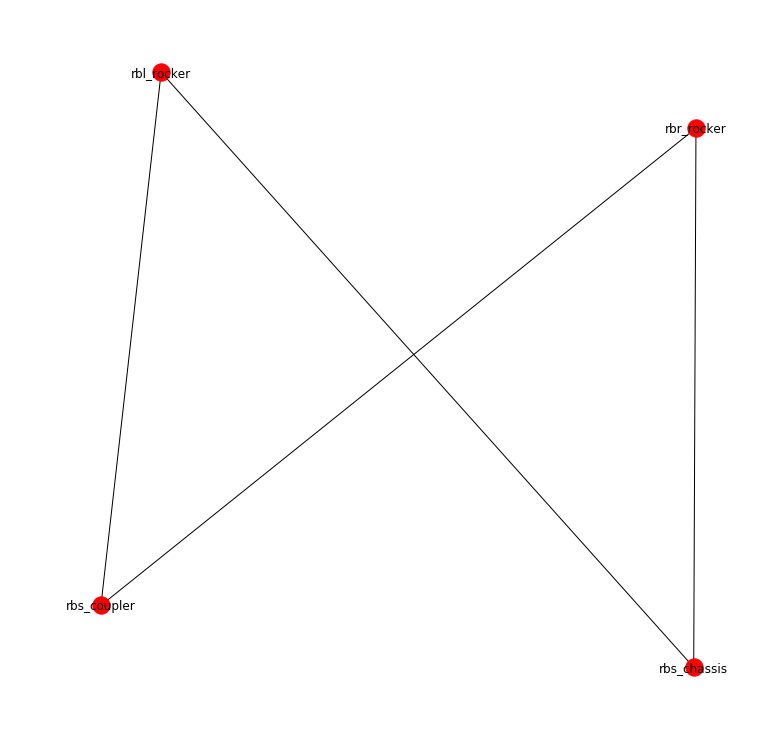

In [12]:
s.draw_topology()

In [38]:
s.bodies['rbl_rocker'].R

[[-568.5]
 [-355. ]
 [ 655.5]]

In [25]:
steer_actuator = absolute_locating('act',s.bodies['rbl_rocker'],'y')
#steer_actuator = absolute_locating('act',steering.bodies['rbl_rocker'],'y')

In [41]:
ac=pd.Series([steer_actuator],index=['act'])
q0   = pd.concat([i.dic    for i in s.bodies])
topology_writer(s.bodies,s.joints,ac,[],'ss')

t=np.linspace(0,2*np.pi,50)
steer_actuator.pos_array=s.bodies['rbl_rocker'].R.y+(20*np.sin(t))
#steer_actuator.pos_array=steering.bodies['rbl_rocker'].R.y+50*np.sin(4*t)

pos_df,vel_df,acc_df,itr=kds(s.bodies,s.joints,ac,'ss',t)


Running System Kinematic Analysis:
Progress: [=========================] 100% of 50 steps.

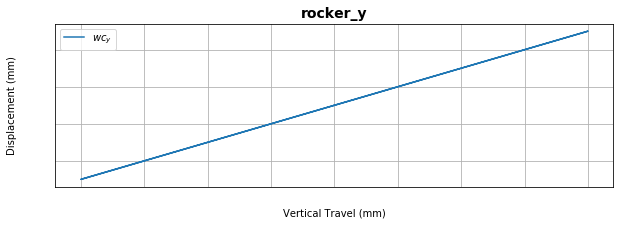

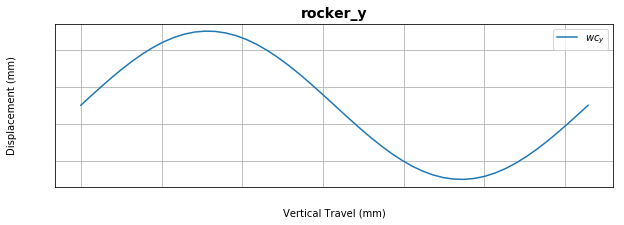

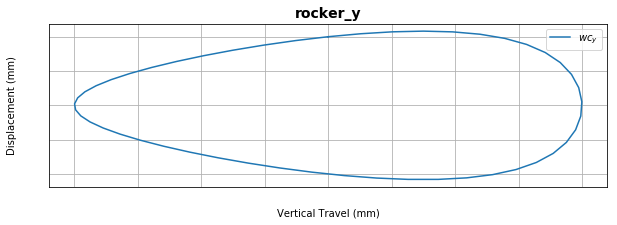

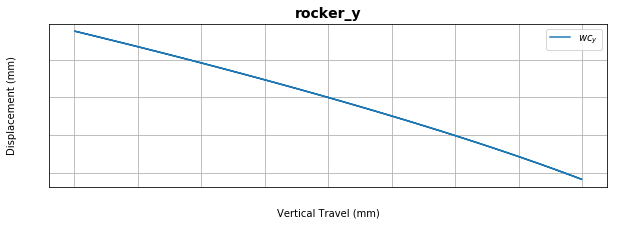

In [42]:
actuator_travel = steer_actuator.pos_array-s.bodies['rbl_rocker'].R.y

figsize=(10,3)
plt.figure('rocker_y',figsize=figsize)
plt.title('rocker_y', fontsize=14, fontweight='bold')
plt.plot(actuator_travel,pos_df['rbl_rocker.y'][1:],label=r'$wc_{y}$')
plt.legend()
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Vertical Travel (mm)')
plt.ylabel('Displacement (mm)')
plt.grid()
plt.show()

plt.figure('',figsize=figsize)
plt.title('rocker_y', fontsize=14, fontweight='bold')
plt.plot(t,steer_actuator.pos_array,label=r'$wc_{y}$')
plt.legend()
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Vertical Travel (mm)')
plt.ylabel('Displacement (mm)')
plt.grid()
plt.show()

plt.figure('s',figsize=figsize)
plt.title('rocker_y', fontsize=14, fontweight='bold')
plt.plot(steer_actuator.pos_array,vel_df['rbr_rocker.y'][1:],label=r'$wc_{y}$')
plt.legend()
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Vertical Travel (mm)')
plt.ylabel('Displacement (mm)')
plt.grid()
plt.show()

plt.figure('sss',figsize=figsize)
plt.title('rocker_y', fontsize=14, fontweight='bold')
plt.plot(actuator_travel,pos_df['rbs_coupler.y'][1:],label=r'$wc_{y}$')
plt.legend()
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Vertical Travel (mm)')
plt.ylabel('Displacement (mm)')
plt.grid()
plt.show()

In [29]:
itr

,iteration
0,0
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [34]:
steering.show_data_flow()

Output()

In [9]:
import sympy as sy
sy.init_printing(True)

In [13]:
t=sy.Symbol('t')
theta=sy.Function('theta')(t)
sy.cos(theta)

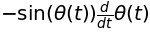

In [19]:
sy.diff(sy.cos(theta),t,1)

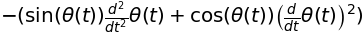

In [20]:
sy.diff(sy.cos(theta),t,2)